In [31]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [32]:
#importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
terror_data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/globalterrorismdb_0718dist.csv', encoding='latin-1')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [34]:

#checking top five rows of each column

terror_data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [35]:
#checking the shape of Data

terror_data.shape

(181691, 135)

In [36]:

#checking data types

terror_data.dtypes

eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object

In [37]:
terror_data.rename(columns={'iyear':'Year', 'imonth':'Month', 'iday':'Day', 'country_txt':'Country', 'region_txt':'Region', 'provstate':'State', 'city':'City',
                   'attacktype1_txt':'Attack_Type', 'targtype1_txt':'Target_Type', 'motive':'Motive', 'weaptype1_txt':'Weapon_Type',
                   'weapdetail':'Weapon_Details', 'nkill':'Kill', 'nwound':'Injured', 'summary':'Summary'}, inplace=True)

In [38]:
terror_data.head()

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,Region,State,City,latitude,longitude,specificity,vicinity,location,Summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,Attack_Type,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,Target_Type,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,Weapon_Details,Kill,nkillus,nkillter,Injured,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [39]:
terror_data = terror_data[['Year','Month','Day','Country','Region','State','City','Attack_Type','Motive','Weapon_Type','Weapon_Details','Kill','Injured','Summary']]

In [40]:
terror_data.head()

,Year,Month,Day,Country,Region,State,City,Attack_Type,Motive,Weapon_Type,Weapon_Details,Kill,Injured,Summary
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,NaN,Unknown,NaN,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),NaN,Unknown,NaN,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,NaN,Unknown,NaN,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,NaN,Explosives,Explosive,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,NaN,Incendiary,Incendiary,NaN,NaN,NaN


In [41]:
#after the renaming and redicting the data checking the shape of data

terror_data.shape

(181691, 14)

In [42]:

#checing the null values

terror_data.isnull().sum()

Year                   0
Month                  0
Day                    0
Country                0
Region                 0
State                421
City                 434
Attack_Type            0
Motive            131130
Weapon_Type            0
Weapon_Details     67670
Kill               10313
Injured            16311
Summary            66129
dtype: int64

In [43]:
print("Hot Zone for terrorism ")
terror_data['Country'].value_counts().head()

Hot Zone for terrorism 


Iraq           24636
Pakistan       14368
Afghanistan    12731
India          11960
Colombia        8306
Name: Country, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


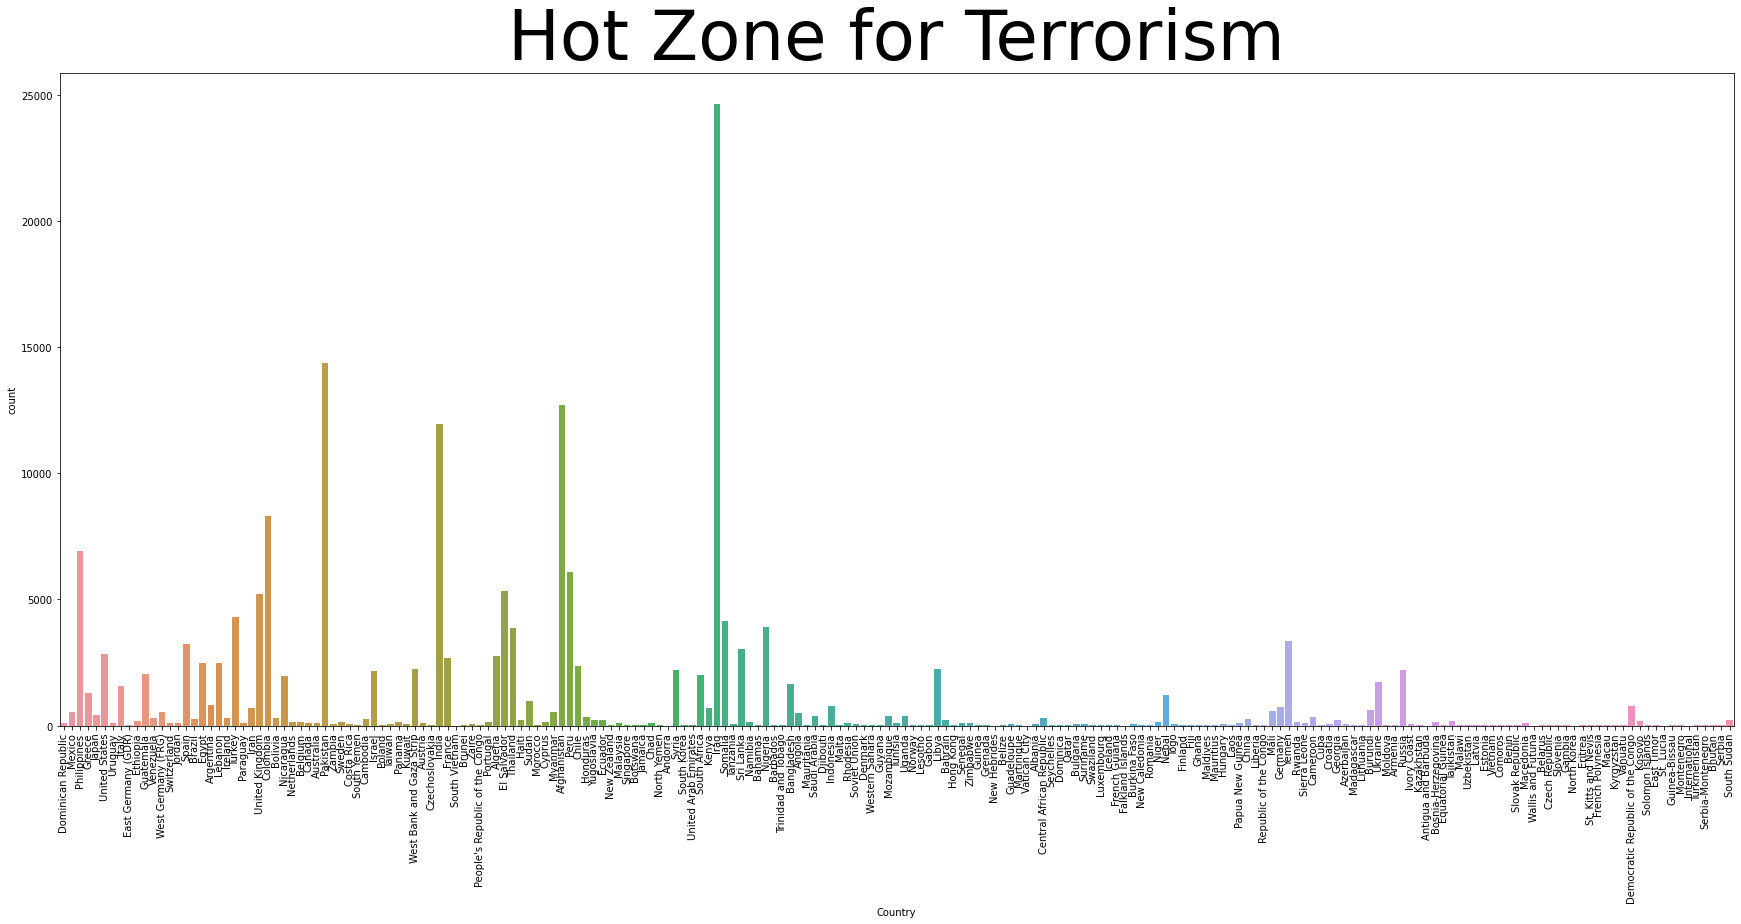

In [44]:
#plotting the countplot Country vs Count of Terrorist Attacks on County

plt.figure(figsize=(30,12))
sns.countplot('Country',data=terror_data)
plt.title('Hot Zone for Terrorism', fontsize=69)
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


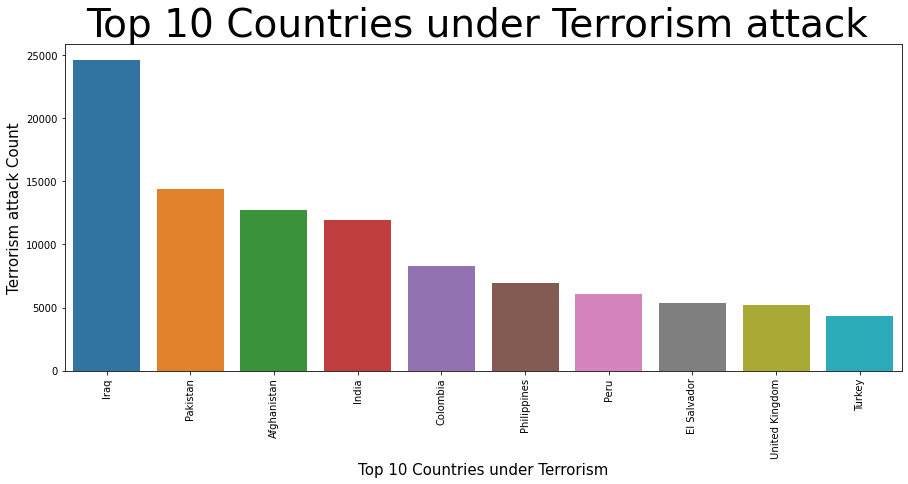

In [45]:

plt.figure(figsize=(15,6))
sns.barplot(terror_data['Country'].value_counts()[:10].index, terror_data['Country'].value_counts()[:10].values)
plt.xlabel('Top 10 Countries under Terrorism', fontsize=15)
plt.ylabel('Terrorism attack Count', fontsize=15)
plt.title('Top 10 Countries under Terrorism attack ', fontsize=39)
plt.xticks(rotation=90)
plt.show()

In [46]:
print("Country with less terrorism ")
terror_data['Country'].value_counts().tail()

Country with less terrorism 


Andorra                1
New Hebrides           1
Antigua and Barbuda    1
Vatican City           1
North Korea            1
Name: Country, dtype: int64

In [47]:
#Number of People Killed and Injured according to the Country

country1 = terror_data.groupby(['Country'])['Country', 'Kill', 'Injured'].sum()
country1.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,Kill,Injured
Country,,
Afghanistan,39384.0,44277.0
Albania,42.0,126.0
Algeria,11066.0,9150.0
Andorra,0.0,0.0
Angola,3043.0,2455.0


In [48]:
print('Amount of pepople Killed and Injured per year')
year1 = terror_data.groupby(['Year'])['Kill', 'Injured'].sum()
year1.head(8)

Amount of pepople Killed and Injured per year


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Kill,Injured
Year,,
1970,174.0,212.0
1971,173.0,82.0
1972,566.0,409.0
1973,370.0,495.0
1974,539.0,865.0
1975,617.0,617.0
1976,674.0,756.0
1977,456.0,518.0


In [49]:
print('Amount of pepople Killed and Injured per year')
year2 = terror_data.groupby(['Year'])['Kill', 'Injured'].sum()
year2.tail(10)

Amount of pepople Killed and Injured per year


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Kill,Injured
Year,,
2008,9157.0,18998.0
2009,9273.0,19138.0
2010,7827.0,15947.0
2011,8246.0,14659.0
2012,15497.0,25445.0
2013,22273.0,37688.0
2014,44490.0,41128.0
2015,38853.0,44043.0
2016,34871.0,40001.0


In [50]:

#Terrorist activity per Year

year3 = terror_data['Year'].value_counts()
year3.head()

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
Name: Year, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


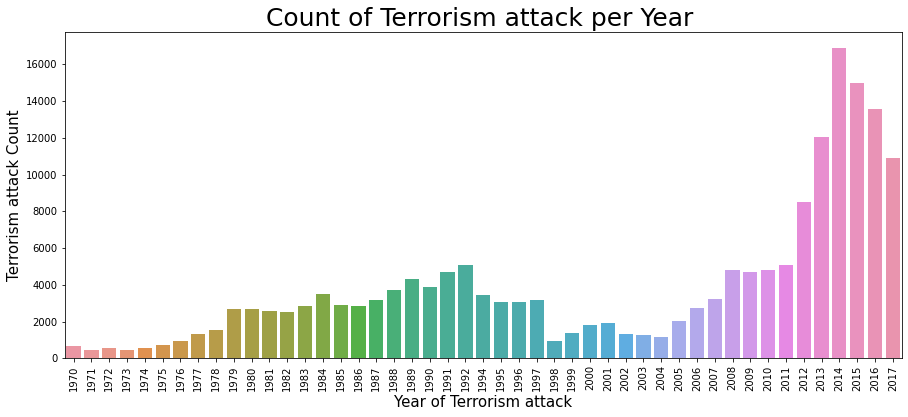

In [51]:
plt.figure(figsize=(15,6))
sns.countplot('Year', data=terror_data)
plt.xlabel('Year of Terrorism attack',fontsize=15)
plt.ylabel('Terrorism attack Count',fontsize=15)
plt.title('Count of Terrorism attack per Year ', fontsize=25)
plt.xticks(rotation=90)
plt.show()

In [52]:
attack_type = terror_data.groupby(['Country'])['Attack_Type', 'Weapon_Type'].max()
attack_type.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Attack_Type,Weapon_Type
Country,,
Afghanistan,Unknown,Vehicle (not to include vehicle-borne explosiv...
Albania,Unknown,Unknown
Algeria,Unknown,Unknown
Andorra,Armed Assault,Firearms
Angola,Unknown,Unknown
Antigua and Barbuda,Facility/Infrastructure Attack,Incendiary
Argentina,Unknown,Unknown
Armenia,Hostage Taking (Kidnapping),Unknown
Australia,Unknown,Vehicle (not to include vehicle-borne explosiv...


In [53]:
#Number of Attacking type used 

terror_data['Attack_Type'].value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Attack_Type, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


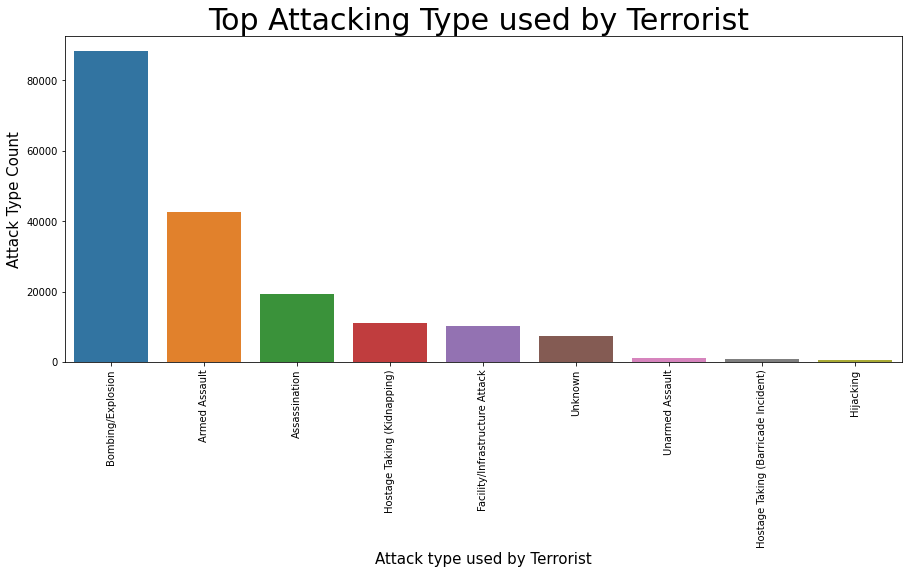

In [54]:
plt.figure(figsize=(15,6))
sns.barplot(terror_data['Attack_Type'].value_counts()[:10].index, terror_data['Attack_Type'].value_counts()[:10].values)
plt.xlabel('Attack type used by Terrorist',fontsize=15)
plt.ylabel('Attack Type Count',fontsize=15)
plt.title('Top Attacking Type used by Terrorist ', fontsize=30)
plt.xticks(rotation=90)
plt.show()

In [55]:
#Weapon types used for attacking purpose

terror_data['Weapon_Type'].value_counts()

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


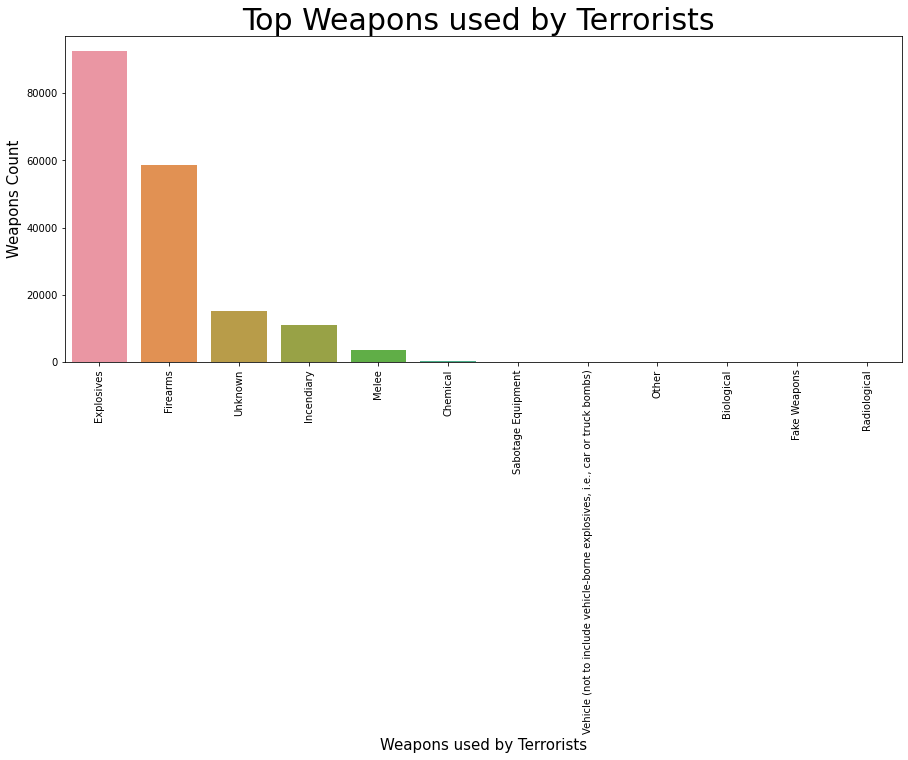

In [56]:
plt.figure(figsize=(15,6))
sns.barplot(terror_data['Weapon_Type'].value_counts()[:15].index, terror_data['Weapon_Type'].value_counts()[:15].values)
plt.xlabel('Weapons used by Terrorists', fontsize=15)
plt.ylabel('Weapons Count' ,fontsize=15)
plt.title('Top Weapons used by Terrorists ', fontsize=30)
plt.xticks(rotation=90)
plt.show()

In [57]:

#Region which is used for attacking purpose

region = terror_data['Region'].value_counts()
region.head()

Middle East & North Africa    50474
South Asia                    44974
South America                 18978
Sub-Saharan Africa            17550
Western Europe                16639
Name: Region, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


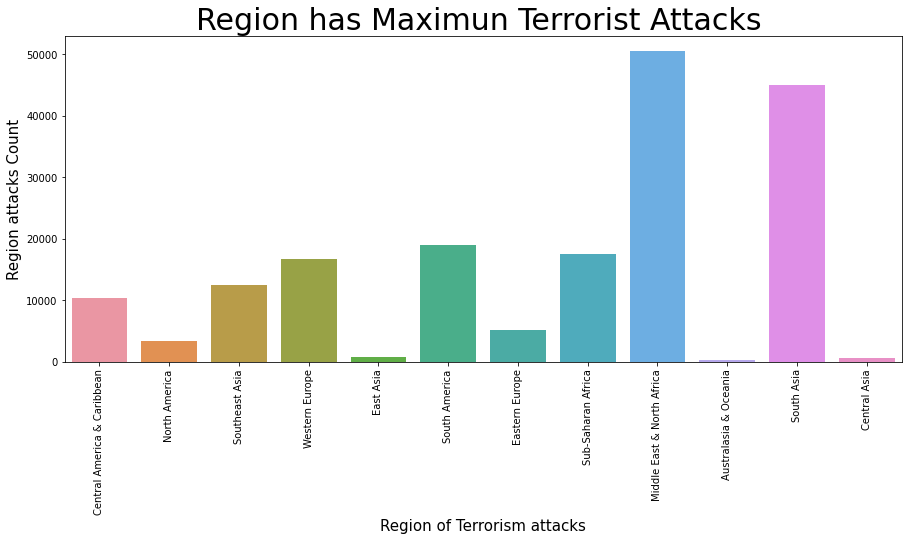

In [58]:
plt.figure(figsize=(15,6))
sns.countplot('Region', data=terror_data)
plt.xlabel('Region of Terrorism attacks', fontsize=15)
plt.ylabel('Region attacks Count', fontsize=15)
plt.title('Region has Maximun Terrorist Attacks ', fontsize=30)
plt.xticks(rotation=90)
plt.show()

In [59]:
#City which is Maximum times under attack

city = terror_data['City'].value_counts()
city.head()

Unknown    9775
Baghdad    7589
Karachi    2652
Lima       2359
Mosul      2265
Name: City, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


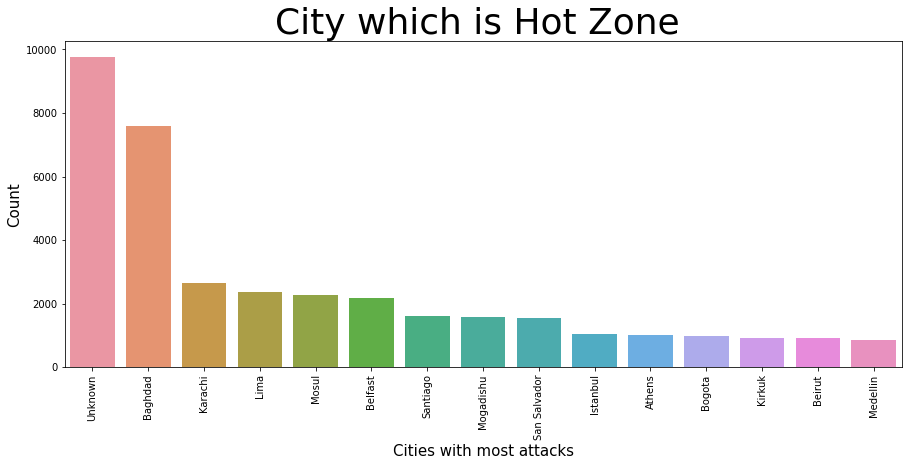

In [60]:
plt.figure(figsize=(15,6))
sns.barplot(terror_data['City'].value_counts()[:15].index, terror_data['City'].value_counts()[:15].values)
plt.xlabel('Cities with most attacks', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('City which is Hot Zone ', fontsize=36)
plt.xticks(rotation=90)
plt.show()